<a href="https://colab.research.google.com/github/simha07ms/travelplanner-/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.320431,24.789800,23.879980,24.778677,212818400
1,2015-01-05,23.635286,24.169166,23.448429,24.089084,257142000
2,2015-01-06,23.637506,23.897772,23.274912,23.699792,263188400
3,2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
4,2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000


In [50]:
# Check if 'Date' column exists before dropping
if 'Date' in df.columns:
    df = df.drop(['Date'], axis=1)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320431,24.789800,23.879980,24.778677,212818400
1,23.635286,24.169166,23.448429,24.089084,257142000
2,23.637506,23.897772,23.274912,23.699792,263188400
3,23.968960,24.069062,23.735387,23.846612,160423600
4,24.889906,24.947743,24.180291,24.298190,237458000


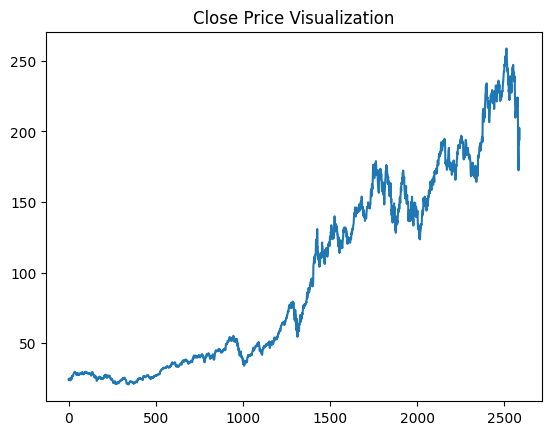

In [51]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [52]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320431,24.789800,23.879980,24.778677,212818400
1,23.635286,24.169166,23.448429,24.089084,257142000
2,23.637506,23.897772,23.274912,23.699792,263188400
3,23.968960,24.069062,23.735387,23.846612,160423600
4,24.889906,24.947743,24.180291,24.298190,237458000
...,...,...,...,...,...
2583,190.419998,194.779999,183.000000,189.070007,121880000
2584,198.149994,199.539993,186.059998,186.100006,87435900
2585,202.520004,212.940002,201.160004,211.440002,101352900


# Plotting moving averages of 100 day

---



In [53]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2583,232.399829
2584,232.101635
2585,231.879307
2586,231.623011


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

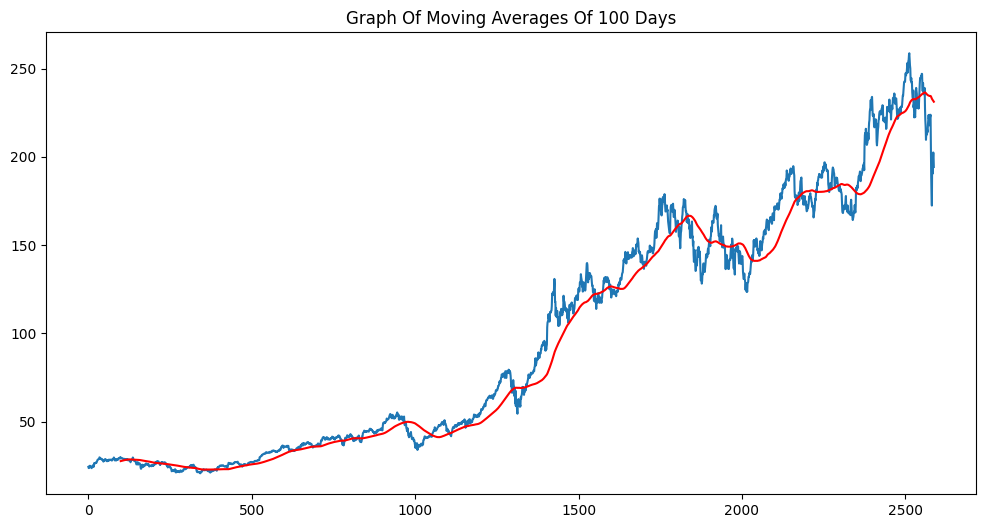

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2583,228.165397
2584,228.114299
2585,228.064221
2586,228.008006


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

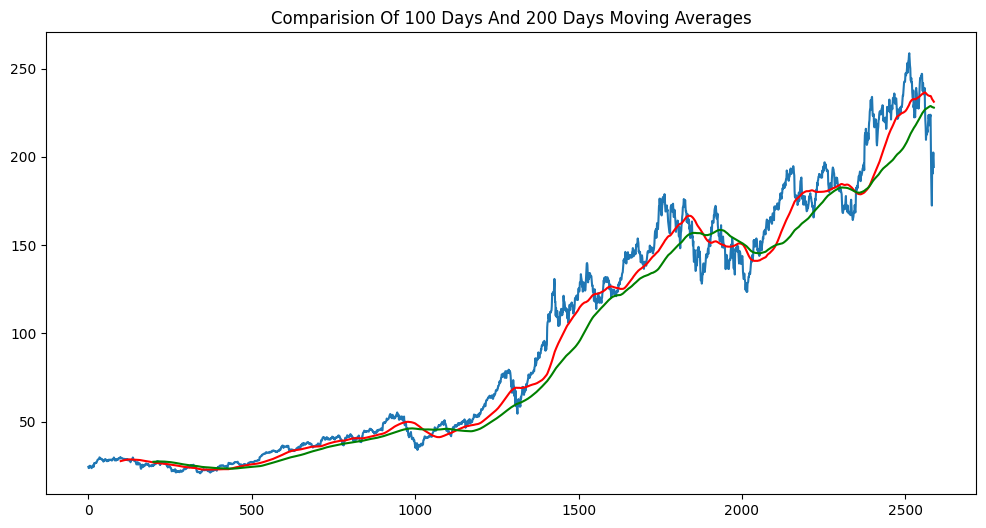

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
df.shape

(2588, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1811, 6)
(777, 6)


In [15]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.320431,24.789800,23.879980,24.778677,212818400
1,2015-01-05,23.635286,24.169166,23.448429,24.089084,257142000
2,2015-01-06,23.637506,23.897772,23.274912,23.699792,263188400
3,2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
4,2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000


In [16]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1811,2022-03-14,148.218338,151.662530,147.706640,149.035105,108732100
1812,2022-03-15,152.617081,153.089438,147.982190,148.493888,92964300
1813,2022-03-16,157.045288,157.448754,151.997098,154.545796,102300200
1814,2022-03-17,158.058853,158.432799,155.116539,156.080909,75615400
1815,2022-03-18,161.365295,161.857323,157.212583,157.950624,123511700


# Using MinMax scaler for normalization of the dataset

---



In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02631937],
       [0.02197938],
       [0.01952934],
       ...,
       [0.87045243],
       [0.8625251 ],
       [0.85465985]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1711, 100, 1)

# ML Model (LSTM)

---



In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
# Assuming x_test and y_test will be defined in later cells
# For now, fitting the model without validation data
model.fit(x_train, y_train, epochs = 50) # Remove validation_data

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - MAE: 0.1559 - loss: 0.0574
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - MAE: 0.0484 - loss: 0.0057
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - MAE: 0.0432 - loss: 0.0050
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - MAE: 0.0519 - loss: 0.0063
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - MAE: 0.0421 - loss: 0.0051
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - MAE: 0.0384 - loss: 0.0039
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - MAE: 0.0401 - loss: 0.0041
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - MAE: 0.0400 - loss: 0.0039
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - MAE: 0.0418 - loss: 0.0044
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - MAE: 0.0407 - loss: 0.0042
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - MAE: 0.0439 - loss: 0.0047
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - MAE: 0.0473 - loss: 0.0056
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [29]:
model.save('keras_model.h5')

In [30]:

test_close.shape
test_close

array([[149.03510535],
       [148.49388799],
       [154.54579572],
       [156.08090871],
       [157.95062419],
       [160.90280343],
       [162.87092418],
       [165.31139897],
       [168.3324489 ],
       [171.10743392],
       [169.42471771],
       [173.87268201],
       [175.70301699],
       [175.00431394],
       [171.25504449],
       [171.78646946],
       [174.6697271 ],
       [169.61166619],
       [168.43081791],
       [169.04093899],
       [166.01989505],
       [165.34090893],
       [164.72096796],
       [167.89943308],
       [161.30628556],
       [162.38871858],
       [166.06906378],
       [166.21670513],
       [163.80575379],
       [158.550891  ],
       [159.66288487],
       [153.42400648],
       [156.71074596],
       [159.25943807],
       [154.2112461 ],
       [155.62826279],
       [157.12404796],
       [161.23738888],
       [153.74792192],
       [152.68360663],
       [153.26507973],
       [151.2743435 ],
       [140.69992744],
       [142

In [31]:
past_100_days = pd.DataFrame(train_close[-100:])

In [32]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [34]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [35]:
final_df.head()

,0
0,144.271264
1,145.929759
2,146.037735
3,146.901307
4,145.910159


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14780899],
       [0.16024664],
       [0.16105639],
       [0.16753263],
       [0.16009965],
       [0.16488329],
       [0.16510398],
       [0.16848967],
       [0.14935465],
       [0.16238132],
       [0.15995241],
       [0.17268454],
       [0.18144265],
       [0.18535533],
       [0.18181784],
       [0.17289962],
       [0.17157287],
       [0.16376023],
       [0.15985397],
       [0.17415235],
       [0.17098314],
       [0.17879578],
       [0.19876975],
       [0.22780905],
       [0.2575118 ],
       [0.25338435],
       [0.25065726],
       [0.24196029],
       [0.24048609],
       [0.24505568],
       [0.3002598 ],
       [0.23584273],
       [0.27475839],
       [0.27674845],
       [0.31205251],
       [0.33453205],
       [0.35502206],
       [0.357233  ],
       [0.40079188],
       [0.35752794],
       [0.35649614],
       [0.38723049],
       [0.31831738],
       [0.30615632],
       [0.33033115],
       [0.34123938],
       [0.36195008],
       [0.371

In [37]:
input_data.shape

(877, 1)

# Testing the model

---



In [38]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(777, 100, 1)
(777,)


In [55]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])

# Train the model
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - MAE: 0.0351 - loss: 0.0028 - val_MAE: 0.0520 - val_loss: 0.0042
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - MAE: 0.0360 - loss: 0.0031 - val_MAE: 0.0511 - val_loss: 0.0042
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.0346 - loss: 0.0027 - val_MAE: 0.0561 - val_loss: 0.0050
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.0401 - loss: 0.0033 - val_MAE: 0.0538 - val_loss: 0.0045
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - MAE: 0.0321 - loss: 0.0021 - val_MAE: 0.0506 - val_loss: 0.0041
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.0332 - loss: 0.0025 - val_MAE: 0.0510 - val_loss: 0.0043
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - MAE: 0.0368 - loss: 0.0029 - val_MAE: 0.0495 - val_loss: 0.0040
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - MAE: 0.0326 - loss: 0.0023 - val_MAE: 0.0512 - val_loss: 0.0043
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - MAE: 0.03

# Making prediction and plotting the graph of predicted vs actual values

---



In [40]:
# Making predictions

y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [41]:
y_pred.shape

(777, 1)

In [42]:
y_test

array([0.18353475, 0.17947597, 0.2248614 , 0.23637377, 0.25039544,
       0.27253489, 0.28729454, 0.30559654, 0.32825248, 0.34906309,
       0.33644379, 0.36980068, 0.38352702, 0.3782872 , 0.35017007,
       0.35415542, 0.37577801, 0.33784579, 0.32899018, 0.3335657 ,
       0.3109098 , 0.30581784, 0.30116868, 0.32500514, 0.27556075,
       0.2836783 , 0.31127854, 0.31238575, 0.29430516, 0.25489705,
       0.2632363 , 0.2164487 , 0.24109714, 0.2602107 , 0.22235249,
       0.23297921, 0.24419664, 0.27504407, 0.21887786, 0.21089618,
       0.21525685, 0.2003276 , 0.12102625, 0.13447719, 0.14157237,
       0.16603542, 0.15118032, 0.09966751, 0.09382874, 0.08422082,
       0.10654075, 0.08895081, 0.08126469, 0.14038972, 0.16758703,
       0.17372155, 0.15842274, 0.15154964, 0.15251036, 0.13270367,
       0.16396579, 0.15287994, 0.10262359, 0.04785907, 0.04978073,
       0.05835366, 0.04202036, 0.0271654 , 0.05192387, 0.06204909,
       0.07705212, 0.09981517, 0.12050895, 0.11629647, 0.08178

In [43]:
y_pred

array([[0.2520439 ],
       [0.24894774],
       [0.2454249 ],
       [0.2412847 ],
       [0.23660876],
       [0.23172703],
       [0.22709052],
       [0.22332202],
       [0.22106579],
       [0.22087573],
       [0.22321397],
       [0.22827268],
       [0.23612607],
       [0.24645619],
       [0.2583615 ],
       [0.27087933],
       [0.28320697],
       [0.29494512],
       [0.30558085],
       [0.31467977],
       [0.32209915],
       [0.32774058],
       [0.33152032],
       [0.33310735],
       [0.33259475],
       [0.33008003],
       [0.32578033],
       [0.3201854 ],
       [0.31392145],
       [0.30747348],
       [0.30099595],
       [0.2945497 ],
       [0.2879445 ],
       [0.28106353],
       [0.27399397],
       [0.26678747],
       [0.25958693],
       [0.2525818 ],
       [0.24612859],
       [0.24037127],
       [0.23527616],
       [0.23072854],
       [0.22651069],
       [0.22222416],
       [0.21742547],
       [0.21173579],
       [0.20515215],
       [0.197

In [44]:
scaler.scale_

array([0.00749936])

In [45]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

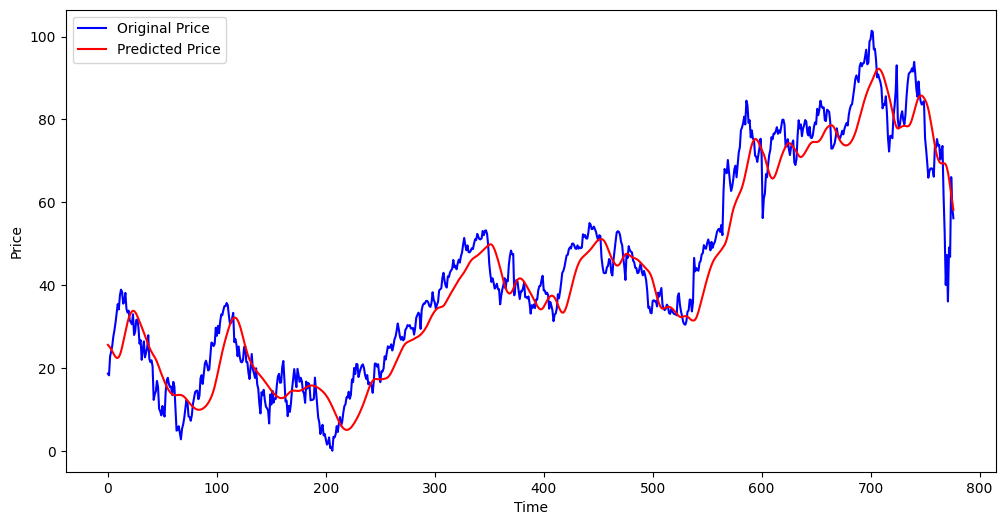

In [46]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

# New Section

In [47]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.420608943354739
